# **Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"**

Nhóm 3:
1. 1712401 - Hồ Trường Giang - TruongGiangBT
2. 1712575 - Hoàng Xuân Long - dralong10
3. 18120249 - Hồ Minh Trí - Crys-Zz0o0
4. 18120374 - Nguyễn Minh Hiếu - templarassVN

Link thùng chứa Github của nhóm: [Link](https://github.com/templarassVN/Team-3_KHDLUD_K18)

## Mô tả bài toán

- Là cuộc thi dự đoán đội thắng và đội thua trong giải đấu bóng rổ nam NCAA năm 2021 (2020-2021) (2021 NCAA Division I Men's Basketball Tournament). [Link](https://www.kaggle.com/c/ncaam-march-mania-2021)
- Cuộc thi chia làm 2 giai đoạn:
  + Giai đoạn 1: Ban tổ chức sẽ cung cấp dữ liệu các trận đấu của các đội ở các mùa giải trước đến mùa giải 2019. Mục đích là để người tham gia có dữ liệu để xây dựng và thử nghiệm các mô hình.
  + Giai đoạn 2: Ban tổ chức sẽ cung cấp thêm dữ liệu về các đội được tham gia giải đấu năm 2021. Người tham gia sẽ tiến hành dự đoán và submit kết quả.
- Tổng quan về giải đấu:
  + Giải đấu gồm 68 đội tham gia chia đều ở 4 khu vực.
  + 8 đội First-Four sẽ thi đấu 4 trận đấu đầu tiên để tranh quyền đi tiếp => Còn lại 64 đội (Mỗi khu cực có 16 đội).
  + 16 đội trong mỗi khu vực sẽ đấu loại trực tiếp theo quy định của giải đấu và chọn ra đội thắng cuộc đại diện cho khu vực thi đấu ở vòng Final Four. Tại vòng Final Four, 4 đội đại diện cho 4 khu vực tiếp tục loại trực tiếp nhau và chọn ra người thắng chung cuộc. 
  + Tổng cộng sẽ có 67 trận đấu (gồm 4 trận First-Four, 15 trận đấu loại khu vực * 4 khu vực, 3 trận Final Four).
- Mô hình bài toán: Dựa vào các thông số thi đấu và thành tích. Ta sẽ thực hiện huấn luyện mô hình với input đầu vào là ID 2 đội (TeamIdA,TeamIdB) và các thuộc tính được rút trích của mỗi đội. Nhãn của mỗi cặp đấu có giá trị là 0 hoặc 1 (0 - đội A thua; 1 - đội A thắng)
- Input bài toán: Đầu vào bài toán là danh sách 68 đội tham gia giải đấu, về mặt lý thuyết ta sẽ có 68*67/2 = 2278 cặp đấu khác nhau. Ta sẽ dự đoán kết quả của 2278 cặp đấu.
- Output: Xác suất đội A thắng đội B.
- Cấu trúc file Submission gồm:
  + Id: [Mùa giải]_ [TeamIdA]_[TeamIdB]. Ex: 2021_1101_1102
  + Pred: Xác suất đội A thắng đội B
- Đánh giá kết quả: Kết quả dự đoán được đánh giá bằng hàm Log Loss.
$$\textrm{LogLoss} = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

## Giải quyết bài toán

- Nhóm đã tìm hiểu và cài đặt lại [giải pháp của tác giả kazukim](https://www.kaggle.com/c/ncaam-march-mania-2021/discussion/230946), đứng thứ 4 private leaderboard với score là 0.56346.
- Nhóm chọn giải này vì đây là giải pháp giành thứ hạng cao trong cuộc thi, tác giả có đề ra những đặc trưng hiệu quả trong việc dự đoán kết quả

### .Nạp dữ liệu và thư viện cần thiết

In [1]:
!gdown --id 1c6Iiy39qeiI1sH1N5MKrBe1C9e8E16Hl
!gdown --id 1Bwe5QinxXItR6g5ODd8AGFYeHQR1xNJ-
!unzip ncaam-march-mania-2021.zip

Downloading...
From: https://drive.google.com/uc?id=1c6Iiy39qeiI1sH1N5MKrBe1C9e8E16Hl
To: /content/ncaam-march-mania-2021.zip
100% 44.7M/44.7M [00:00<00:00, 48.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Bwe5QinxXItR6g5ODd8AGFYeHQR1xNJ-
To: /content/2021NCAA.csv
100% 895/895 [00:00<00:00, 651kB/s]
Archive:  ncaam-march-mania-2021.zip
  inflating: MDataFiles_Stage1/Cities.csv  
  inflating: MDataFiles_Stage1/Conferences.csv  
  inflating: MDataFiles_Stage1/MConferenceTourneyGames.csv  
  inflating: MDataFiles_Stage1/MGameCities.csv  
  inflating: MDataFiles_Stage1/MMasseyOrdinals.csv  
  inflating: MDataFiles_Stage1/MNCAATourneyCompactResults.csv  
  inflating: MDataFiles_Stage1/MNCAATourneyDetailedResults.csv  
  inflating: MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv  
  inflating: MDataFiles_Stage1/MNCAATourneySeeds.csv  
  inflating: MDataFiles_Stage1/MNCAATourneySlots.csv  
  inflating: MDataFiles_Stage1/MRegularSeasonCompactResults.csv  
  inflating: MDataFiles

In [2]:
# Load các thư viện cần thiết
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
import lightgbm as lgb

### I. Cấu hình

In [3]:
# Cấu hình các tham số của Model
SEED = 1010
LGBM_PARAMS = {
    'num_leaves': 300, # Số lá tối đa
    'max_bin':450, #Số bin tối đa
    'objective': 'binary', # Loại mô hình (binary: hồi quy logistic)
    'learning_rate': 0.01, # Tỉ lệ học
    'boosting_type': 'gbdt',  
    'random_state': 1010, # Tạo seed random
    'metric':"binary_logloss",
    'verbosity':-1
}
LGBM_FIT_PARAMS = {
    'num_boost_round': 10000, # Số vòng thực hiện tăng cường
    'early_stopping_rounds': 50, # Số lần mà nếu valid_score ngưng cải thiện thì sẽ dừng sớm 
    'verbose_eval': 100, # In ra đánh giá sau verbose_eval lần
}

#### 1. Hàm hàm huấn luyện LightGBM

In [4]:

def train_lgbm(X_train, Y_train, X_valid, Y_valid, X_test, fold_id, lgb_params, fit_params, loss_func, calc_importances=True):

    train = lgb.Dataset(X_train, Y_train,)

    if X_valid is not None: 
        valid = lgb.Dataset(X_valid, Y_valid)
        model = lgb.train(lgb_params, train,
                          valid_sets=[train,valid], **fit_params)
        Y_pred_valid = model.predict(X_valid)
        valid_loss = loss_func(Y_valid, Y_pred_valid)
    else:
        model = lgb.train(lgb_params, train,
                          **fit_params)
        Y_pred_valid = None
        valid_loss = None

    if X_test is not None:
        Y_pred_test = model.predict(X_test) 
    else:
        Y_pred_test = None

    if calc_importances:
        importances = pd.DataFrame()
        importances['gain'] = model.feature_importance(importance_type='gain')
        importances['split'] = model.feature_importance(importance_type='split')
        importances['fold'] = fold_id
    else:
        importances = None

    return Y_pred_valid, Y_pred_test, valid_loss, importances, model.best_iteration, model

#### 2. Hàm thiết lập đầu vào

In [5]:
def add_loosing_matches(win_df):
    win_rename = {
        "WTeamID": "TeamIdA", 
        "WScore" : "Score1", 
        "LTeamID" : "TeamIdB",
        "LScore": "Score2",
        'FGMW':'FGMA', 
        'FGAW':'FGAA', 
        'FGM3W':'FGM3A',
        'FGA3W':'FGA3A',
        'FTMW':'FTMA', 
        'FTAW':'FTAA', 
        'ORW':'ORA', 
        'DRW':'DRA',
        'AstW':'AstA',
        'TOW':'TOA',
        'StlW':'StlA',
        'BlkW':'BlkA',
        'PFW':'PFA',
        'FG%W':'FG%A',
        '3P%W':'3P%A',
        'FT%W':'FT%A',
        'eFG%W':'eFG%A',
        'TOV%W':'TOV%A',
        'FreeThrowsW':'FreeThrowsA',
        'POSSW':'POSSA',
        'PPPW':'PPPA',
        'TS%W':'TS%A',
        'EVW':'EVA',
        'TRW':'TRA',
        'OR%W':'OR%A',
        'ScoreW':'ScoreA',
        'ScoredW':'ScoredA',
        'ScoregapW':'ScoregapA',
        'NumWinsW': 'NumWinsA', 
        'NumLosesW':'NumLosesA', 
        'WinRatioW':'WinRatioA',
        'RatingW': 'RatingA',
        'FGML':'FGMB',
        'FGAL':'FGAB', 
        'FGM3L':'FGM3B',
        'FGA3L':'FGA3B',
        'FTML':'FTMB', 
        'FTAL':'FTAB', 
        'ORL':'ORB',
        'DRL':'DRB',
        'AstL':'AstB',
        'TOL':'TOB',
        'StlL':'StlB',
        'BlkL':'BlkB',
        'PFL':'PFB',
        'FG%L':'FG%B',
        '3P%L':'3P%B',
        'FT%L':'FT%B',
        'eFG%L':'eFG%B',
        'TOV%L':'TOV%B',
        'FreeThrowsL':'FreeThrowsB',
        'POSSL':'POSSB',
        'PPPL':'PPPB',
        'TS%L':'TS%B',
        'EVL':'EVB',
        'TRL':'TRB',
        'OR%L':'OR%B',
        'ScoreL':'ScoreB',
        'ScoredL':'ScoredB',
        'ScoregapL':'ScoregapB',
        'NumWinsL': 'NumWinsB',
        'NumLosesL':'NumLosesB', 
        'WinRatioL':'WinRatioB',
        'RatingL': 'RatingB',
     }
    
    lose_rename = {
        "WTeamID": "TeamIdB", 
        "WScore" : "Score2", 
        "LTeamID" : "TeamIdA",
        "LScore": "Score1",
        'FGMW':'FGMB', 
        'FGAW':'FGAB', 
        'FGM3W':'FGM3B',
        'FGA3W':'FGA3B',
        'FTMW':'FTMB', 
        'FTAW':'FTAB', 
        'ORW':'ORB', 
        'DRW':'DRB',
        'AstW':'AstB',
        'TOW':'TOB',
        'StlW':'StlB',
        'BlkW':'BlkB',
        'PFW':'PFB',
        'FG%W':'FG%B',
        '3P%W':'3P%B',
        'FT%W':'FT%B',
        'eFG%W':'eFG%B',
        'TOV%W':'TOV%B',
        'FreeThrowsW':'FreeThrowsB',
        'POSSW':'POSSB',
        'PPPW':'PPPB',
        'TS%W':'TS%B',
        'EVW':'EVB',
        'TRW':'TRB',
        'OR%W':'OR%B',
        'ScoreW':'ScoreB',
        'ScoredW':'ScoredB',
        'ScoregapW':'ScoregapB',
        'NumWinsW': 'NumWinsB', 
        'NumLosesW':'NumLosesB', 
        'WinRatioW':'WinRatioB',
        'RatingW': 'RatingB',
        'FGML':'FGMA',
        'FGAL':'FGAA', 
        'FGM3L':'FGM3A',
        'FGA3L':'FGA3A',
        'FTML':'FTMA', 
        'FTAL':'FTAA', 
        'ORL':'ORA',
        'DRL':'DRA',
        'AstL':'AstA',
        'TOL':'TOA',
        'StlL':'StlA',
        'BlkL':'BlkA',
        'PFL':'PFA',
        'FG%L':'FG%A',
        '3P%L':'3P%A',
        'FT%L':'FT%A',
        'eFG%L':'eFG%A',
        'TOV%L':'TOV%A',
        'FreeThrowsL':'FreeThrowsA',
        'POSSL':'POSSA',
        'PPPL':'PPPA',
        'TS%L':'TS%A',
        'EVL':'EVA',
        'TRL':'TRA',
        'OR%L':'OR%A',
        'ScoreL':'ScoreA',
        'ScoredL':'ScoredA',
        'ScoregapL':'ScoregapA',
        'NumWinsL': 'NumWinsA',
        'NumLosesL':'NumLosesA', 
        'WinRatioL':'WinRatioA',
        'RatingL': 'RatingA',
    }
    
    win_df = win_df.copy()
    lose_df = win_df.copy()
    
    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)
    
    return pd.concat([win_df, lose_df], 0, sort=False)

### II. Đọc dữ liệu

In [6]:
datasets_path = './MDataFiles_Stage2/'
os.listdir('./MDataFiles_Stage2/')

['MRegularSeasonCompactResults.csv',
 'MNCAATourneySeeds.csv',
 'MTeams.csv',
 'MNCAATourneySlots.csv',
 'MSampleSubmissionStage2.csv',
 'MSecondaryTourneyTeams.csv',
 'MSeasons.csv',
 'MTeamSpellings.csv',
 'MTeamConferences.csv',
 'MTeamCoaches.csv',
 'MMasseyOrdinals.csv',
 'MConferenceTourneyGames.csv',
 'MNCAATourneySeedRoundSlots.csv',
 'MRegularSeasonDetailedResults.csv',
 'MGameCities.csv',
 'MNCAATourneyDetailedResults.csv',
 'MNCAATourneyCompactResults.csv',
 'MSecondaryTourneyCompactResults.csv',
 'Conferences.csv',
 'Cities.csv']

In [7]:
ordinals = pd.read_csv(datasets_path + 'MMasseyOrdinals.csv').rename(columns={'RankingDayNum':'DayNum'})
seeds = pd.read_csv(datasets_path + 'MNCAATourneySeeds.csv')
regular_results = pd.read_csv(datasets_path + 'MRegularSeasonDetailedResults.csv')
tourney_results = pd.read_csv(datasets_path + 'MNCAATourneyCompactResults.csv')

### III. Prerocessing, Feature Extraction

#### 1. Tính trung bình tất cả hệ thống Rank and chuyển đổi sang Rating

In [8]:
# Lấy thứ hạn cuối cùng (thường DayNum=133) theo nhóm
ordinals = ordinals.groupby(['SystemName','Season','TeamID']).last().reset_index()
# Tạo bảng gồm Season, TeamID, OrdinalRank; với OrdinalRank là thứ hạn trung bình trên các SystemName
ordinals = ordinals.groupby(['Season','TeamID'])['OrdinalRank'].apply(list).apply(np.mean).reset_index()
# Thêm thuộc tính Rating = 100 - 4*log(OrdinalRank +1) - OrdinalRank/22
ordinals['Rating'] = 100-4*np.log(ordinals['OrdinalRank']+1)-ordinals['OrdinalRank']/22
ordinals

,Season,TeamID,OrdinalRank,Rating
0,2003,1102,154.058824,72.822108
1,2003,1103,168.705882,71.795283
2,2003,1104,36.638889,83.822445
3,2003,1105,308.735294,63.023705
4,2003,1106,260.911765,65.868344
...,...,...,...,...
6539,2021,1467,240.490566,67.121289
6540,2021,1468,180.288462,71.004712
6541,2021,1469,314.666667,62.678222
6542,2021,1470,252.823529,66.361464


#### 2. Tính số trận thắng/thua của đội trong mùa giải

In [9]:
# Đếm số tận thắng
num_win = regular_results.groupby(['Season', 'WTeamID']).count()
num_win = num_win.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "NumWins", "WTeamID": "TeamID"})
# Đếm số trận thua
num_lose = regular_results.groupby(['Season', 'LTeamID']).count()
num_lose = num_lose.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "NumLoses", "LTeamID": "TeamID"})
# Ghép 2 bảng lại
win_lose = pd.merge(num_win, num_lose, how='outer', on=['Season', 'TeamID']).fillna(0).sort_values(by=['Season','TeamID']).reset_index(drop=True)
win_lose

,Season,TeamID,NumWins,NumLoses
0,2003,1102,12.0,16.0
1,2003,1103,13.0,14.0
2,2003,1104,17.0,11.0
3,2003,1105,7.0,19.0
4,2003,1106,13.0,15.0
...,...,...,...,...
6529,2021,1467,9.0,9.0
6530,2021,1468,11.0,7.0
6531,2021,1469,6.0,13.0
6532,2021,1470,5.0,10.0


#### 3. Thống kê trung bình số liệu của đội trong mỗi mùa giải

In [10]:
# Tính trung bình số liệu trận thắng của mỗi đội theo mùa
wteam_stats = regular_results.groupby(['Season', 'WTeamID']).mean().reset_index()
# Loại bỏ các thuộc tính của đội thua
wteam_stats = wteam_stats.drop(['DayNum','LTeamID', 'NumOT','LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 
                                'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',], axis=1)
# Đổi tên các thuộc tính của đội thắng thành tên chung
wteam_stats = wteam_stats.rename(columns={"WTeamID": "TeamID", 'WScore':'Score','LScore':'Scored', 'WFGM':'FGM',
                                        'WFGA':'FGA', 'WFGM3':'FGM3','WFGA3':'FGA3', 'WFTM':'FTM', 'WFTA':'FTA',
                                        'WOR':'OR', 'WDR':'DR','WAst':'Ast','WTO':'TO','WStl':'Stl','WBlk':'Blk','WPF':'PF'})
wteam_stats

,Season,TeamID,Score,Scored,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1102,68.750000,53.166667,22.583333,40.000000,10.000000,21.583333,13.583333,20.750000,3.833333,19.333333,16.916667,11.083333,7.333333,2.833333,16.083333
1,2003,1103,87.769231,78.384615,30.000000,55.384615,5.461538,14.384615,22.307692,30.923077,9.384615,21.461538,17.692308,12.538462,7.307692,1.846154,20.461538
2,2003,1104,74.705882,61.529412,25.823529,58.352941,7.058824,20.823529,16.000000,22.529412,13.529412,26.411765,14.000000,13.058824,7.235294,4.176471,16.470588
3,2003,1105,79.428571,66.428571,25.571429,61.857143,9.142857,22.428571,19.142857,25.714286,14.571429,25.857143,15.857143,18.000000,11.285714,2.000000,19.428571
4,2003,1106,68.307692,57.923077,24.769231,53.846154,5.846154,15.923077,12.923077,20.769231,12.769231,28.000000,13.000000,17.692308,9.384615,3.769231,18.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,2021,1467,71.000000,61.777778,25.888889,53.000000,7.111111,21.777778,12.111111,17.888889,5.777778,25.000000,13.444444,13.888889,8.222222,3.888889,3.555556
6524,2021,1468,76.000000,62.363636,28.363636,55.181818,6.636364,18.454545,12.636364,16.181818,7.545455,21.636364,15.909091,10.636364,7.181818,2.272727,1.636364
6525,2021,1469,76.666667,71.833333,25.833333,59.166667,6.833333,19.833333,18.166667,23.500000,7.500000,23.833333,15.000000,12.666667,7.333333,1.666667,3.333333
6526,2021,1470,69.000000,56.200000,24.000000,50.800000,5.800000,12.800000,15.200000,18.400000,3.800000,22.800000,14.400000,8.000000,6.200000,2.000000,15.000000


In [11]:
# Tính trung bình số liệu trận thua của mỗi đội theo mùa
lteam_stats = regular_results.groupby(['Season', 'LTeamID']).mean().reset_index()
# Loại bỏ các thuộc tính của đội thắng
lteam_stats = lteam_stats.drop(['DayNum', 'WTeamID', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM',
                                'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF'], axis=1)
# Đổi tên các thuộc tính của đội thua thành tên chung
lteam_stats = lteam_stats.rename(columns={"LTeamID": "TeamID", 'LScore':'Score','WScore':'Scored', 'LFGM':'FGM',
                                        'LFGA':'FGA', 'LFGM3':'FGM3','LFGA3':'FGA3', 'LFTM':'FTM', 'LFTA':'FTA',
                                        'LOR':'OR', 'LDR':'DR','LAst':'Ast','LTO':'TO','LStl':'Stl','LBlk':'Blk','LPF':'PF'})
lteam_stats

,Season,TeamID,Scored,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1102,59.875000,48.625000,16.562500,39.625000,6.187500,20.250000,9.312500,14.375000,4.437500,14.937500,10.062500,11.687500,4.937500,1.000000,20.750000
1,2003,1103,77.928571,70.428571,24.500000,56.285714,5.428571,17.642857,16.000000,21.142857,10.142857,18.500000,12.928571,12.714286,7.214286,2.785714,19.285714
2,2003,1104,70.363636,60.909091,21.272727,55.363636,5.272727,18.363636,13.090909,18.454545,13.636364,20.090909,9.181818,13.636364,5.636364,3.181818,20.454545
3,2003,1105,80.421053,68.947368,23.947368,61.526316,7.000000,20.157895,14.052632,20.421053,13.105263,22.105263,14.052632,18.894737,8.578947,2.105263,20.526316
4,2003,1106,68.800000,59.533333,22.266667,56.533333,6.333333,19.133333,8.666667,12.733333,11.866667,20.266667,10.533333,16.466667,7.466667,2.600000,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,2021,1467,71.555556,61.555556,22.333333,54.444444,6.888889,22.444444,10.000000,15.444444,5.777778,19.222222,10.555556,12.111111,7.777778,3.666667,11.777778
6527,2021,1468,77.571429,67.142857,25.571429,53.428571,5.857143,14.857143,10.142857,14.428571,5.428571,17.000000,14.142857,11.142857,5.714286,1.714286,4.285714
6528,2021,1469,81.153846,63.461538,22.230769,57.230769,5.384615,19.615385,13.615385,19.076923,7.769231,22.846154,14.153846,16.461538,6.461538,2.230769,4.769231
6529,2021,1470,74.100000,61.300000,21.000000,50.900000,5.300000,15.500000,14.000000,19.900000,4.700000,18.800000,9.800000,12.400000,7.000000,2.400000,2.600000


In [12]:
# Ghép 2 số liệu của các trận thắng và thua lại
regular_season_feature = pd.concat([wteam_stats, lteam_stats], 0).reset_index(drop=True)
# Tính trung bình
regular_season_feature = regular_season_feature.groupby(['Season', 'TeamID']).mean().reset_index()
regular_season_feature

,Season,TeamID,Score,Scored,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1102,58.687500,56.520833,19.572917,39.812500,8.093750,20.916667,11.447917,17.562500,4.135417,17.135417,13.489583,11.385417,6.135417,1.916667,18.416667
1,2003,1103,79.098901,78.156593,27.250000,55.835165,5.445055,16.013736,19.153846,26.032967,9.763736,19.980769,15.310440,12.626374,7.260989,2.315934,19.873626
2,2003,1104,67.807487,65.946524,23.548128,56.858289,6.165775,19.593583,14.545455,20.491979,13.582888,23.251337,11.590909,13.347594,6.435829,3.679144,18.462567
3,2003,1105,74.187970,73.424812,24.759398,61.691729,8.071429,21.293233,16.597744,23.067669,13.838346,23.981203,14.954887,18.447368,9.932331,2.052632,19.977444
4,2003,1106,63.920513,63.361538,23.517949,55.189744,6.089744,17.528205,10.794872,16.751282,12.317949,24.133333,11.766667,17.079487,8.425641,3.184615,18.192308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,2021,1467,66.277778,66.666667,24.111111,53.722222,7.000000,22.111111,11.055556,16.666667,5.777778,22.111111,12.000000,13.000000,8.000000,3.777778,7.666667
6530,2021,1468,71.571429,69.967532,26.967532,54.305195,6.246753,16.655844,11.389610,15.305195,6.487013,19.318182,15.025974,10.889610,6.448052,1.993506,2.961039
6531,2021,1469,70.064103,76.493590,24.032051,58.198718,6.108974,19.724359,15.891026,21.288462,7.634615,23.339744,14.576923,14.564103,6.897436,1.948718,4.051282
6532,2021,1470,65.150000,65.150000,22.500000,50.850000,5.550000,14.150000,14.600000,19.150000,4.250000,20.800000,12.100000,10.200000,6.600000,2.200000,8.800000


#### 4. Tính và thêm các thuộc tính Scoregap, FG%, 3P%, FT%, EV, TR, TS, eFG%, OR%, TOV%, FreeThrows, POSS, PPP

In [13]:
# Score-gab: Độ chênh lệch điểm ???
regular_season_feature['Scoregap'] = regular_season_feature['Score'] - regular_season_feature['Scored']
# FG%: Hiệu suất ghi bàn
regular_season_feature['FG%'] = regular_season_feature['FGM']/regular_season_feature['FGA']
# 3P%: Hiệu suất cú ném 3 điểm
regular_season_feature['3P%'] = regular_season_feature['FGM3']/regular_season_feature['FGA3']
# FT% (Free Throws Percentage): Hiệu suất cú ném tự do
regular_season_feature['FT%'] = regular_season_feature['FTM']/regular_season_feature['FTA']
# EV(expect value) ???
regular_season_feature['EV'] = regular_season_feature['FGM']*regular_season_feature['FG%'] \
                            + regular_season_feature['FGM3']*regular_season_feature['3P%'] \
                            + regular_season_feature['FTM']*regular_season_feature['FT%'] \
# TR (Total Rebounds)
regular_season_feature['TR'] = regular_season_feature['OR'] + regular_season_feature['DR']
# TS% (True Shooting Percentage)
regular_season_feature['TS%'] = regular_season_feature['Score']/(2*(regular_season_feature['FGA'] + 0.44*regular_season_feature['FTA']))
## Four-Factor
# eFG% (Effective Field Goal Percentage)
regular_season_feature['eFG%'] = (regular_season_feature['FGM'] +0.5*regular_season_feature['FGM3'])/regular_season_feature['FGA']
# OR% (Offensive Rebound) ???
regular_season_feature['OR%'] = regular_season_feature['OR']/regular_season_feature['FGA']
# TOV% (Turnovers)
regular_season_feature['TOV%'] = regular_season_feature['TO']/(regular_season_feature['FGA'] + 0.44*regular_season_feature['FTA'] +regular_season_feature['TO'])
# 
regular_season_feature['FreeThrows'] = regular_season_feature['FTM']/regular_season_feature['FGA']

# PPP/POSS ???
regular_season_feature['POSS'] = regular_season_feature['FGA'] +0.44*regular_season_feature['FTA'] + regular_season_feature['TO']

regular_season_feature['PPP'] = regular_season_feature['Score']/regular_season_feature['POSS']

# Win-Lose
regular_season_feature = regular_season_feature.merge(win_lose, on=['Season', 'TeamID'],how='left').reset_index(drop=True)
regular_season_feature['WinRatio'] = regular_season_feature['NumWins']/(regular_season_feature['NumWins'] + regular_season_feature['NumLoses'])

regular_season_feature

,Season,TeamID,Score,Scored,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Scoregap,FG%,3P%,FT%,EV,TR,TS%,eFG%,OR%,TOV%,FreeThrows,POSS,PPP,NumWins,NumLoses,WinRatio
0,2003,1102,58.687500,56.520833,19.572917,39.812500,8.093750,20.916667,11.447917,17.562500,4.135417,17.135417,13.489583,11.385417,6.135417,1.916667,18.416667,2.166667,0.491627,0.386952,0.651839,20.216672,21.270833,0.617243,0.593276,0.103872,0.193217,0.287546,58.925417,0.995962,12.0,16.0,0.428571
1,2003,1103,79.098901,78.156593,27.250000,55.835165,5.445055,16.013736,19.153846,26.032967,9.763736,19.980769,15.310440,12.626374,7.260989,2.315934,19.873626,0.942308,0.488044,0.340024,0.735753,29.243149,29.744505,0.587749,0.536804,0.174867,0.157995,0.343043,79.916044,0.989775,13.0,14.0,0.481481
2,2003,1104,67.807487,65.946524,23.548128,56.858289,6.165775,19.593583,14.545455,20.491979,13.582888,23.251337,11.590909,13.347594,6.435829,3.679144,18.462567,1.860963,0.414155,0.314683,0.709812,22.017375,36.834225,0.514670,0.468375,0.238890,0.168483,0.255819,79.222353,0.855914,17.0,11.0,0.607143
3,2003,1105,74.187970,73.424812,24.759398,61.691729,8.071429,21.293233,16.597744,23.067669,13.838346,23.981203,14.954887,18.447368,9.932331,2.052632,19.977444,0.763158,0.401341,0.379061,0.719524,24.938992,37.819549,0.516331,0.466758,0.224314,0.204315,0.269043,90.288872,0.821673,7.0,19.0,0.269231
4,2003,1106,63.920513,63.361538,23.517949,55.189744,6.089744,17.528205,10.794872,16.751282,12.317949,24.133333,11.766667,17.079487,8.425641,3.184615,18.192308,0.558974,0.426129,0.347425,0.644421,19.093849,36.451282,0.510871,0.481300,0.223193,0.214459,0.195596,79.639795,0.802620,13.0,15.0,0.464286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,2021,1467,66.277778,66.666667,24.111111,53.722222,7.000000,22.111111,11.055556,16.666667,5.777778,22.111111,12.000000,13.000000,8.000000,3.777778,7.666667,-0.388889,0.448811,0.316583,0.663333,20.370925,27.888889,0.542766,0.513961,0.107549,0.175544,0.205791,74.055556,0.894974,9.0,9.0,0.500000
6530,2021,1468,71.571429,69.967532,26.967532,54.305195,6.246753,16.655844,11.389610,15.305195,6.487013,19.318182,15.025974,10.889610,6.448052,1.993506,2.961039,1.603896,0.496592,0.375049,0.744166,24.210466,25.805195,0.586272,0.554107,0.119455,0.151394,0.209733,71.929091,0.995028,11.0,7.0,0.611111
6531,2021,1469,70.064103,76.493590,24.032051,58.198718,6.108974,19.724359,15.891026,21.288462,7.634615,23.339744,14.576923,14.564103,6.897436,1.948718,4.051282,-6.429487,0.412931,0.309717,0.746462,23.677678,30.974359,0.518489,0.465415,0.131182,0.177330,0.273048,82.129744,0.853090,6.0,13.0,0.315789
6532,2021,1470,65.150000,65.150000,22.500000,50.850000,5.550000,14.150000,14.600000,19.150000,4.250000,20.800000,12.100000,10.200000,6.600000,2.200000,8.800000,0.000000,0.442478,0.392226,0.762402,23.263678,25.050000,0.549548,0.497050,0.083579,0.146813,0.287119,69.476000,0.937734,5.0,10.0,0.333333


#### 5. Ghép các bảng lại

In [14]:
tourney_results = pd.read_csv(datasets_path + 'MNCAATourneyCompactResults.csv')
# Lấy thông tin mùa giải 2003 đến nay
tourney_results = tourney_results[tourney_results['Season'] >= 2003].reset_index(drop=True)
# Ghép mã các đội thắng với bảng ở mục 4 theo mùa giải
tourney_results = tourney_results.merge(regular_season_feature, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
# Đổi tên thuộc tính
tourney_results = tourney_results.rename(columns={ 'NumWins': 'NumWinsW', 'NumLoses':'NumLosesW', 'WinRatio': 'WinRatioW',
                                                 'FGM':'FGMW', 'FGA':'FGAW', 'FGM3':'FGM3W','FGA3':'FGA3W', 'FTM':'FTMW','FTA':'FTAW',
                                                 'OR':'ORW','DR':'DRW','Ast':'AstW','TO':'TOW','Stl':'StlW','Blk':'BlkW','PF':'PFW',
                                                 'FG%':'FG%W','3P%':'3P%W','FT%':'FT%W','eFG%':'eFG%W','TOV%':'TOV%W',
                                                 'FreeThrows':'FreeThrowsW', 'POSS':'POSSW','PPP':'PPPW','TS%':'TS%W','EV':'EVW','TR':'TRW','OR%':'OR%W',
                                                 'Score':'ScoreW', 'Scored':'ScoredW','Scoregap':'ScoregapW'}).drop(columns='TeamID', axis=1)
# Ghép mã các đội thắng với bảng ở mục 1 theo mùa giải
tourney_results = tourney_results.merge(ordinals[['Season', 'TeamID', 'Rating']],left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], 
                                        how='left').rename(columns={'Rating':'RatingW'}).drop(columns='TeamID', axis=1)
# Ghép mã các đội thua với bảng ở mục 4 theo mùa giải
tourney_results = tourney_results.merge(regular_season_feature, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left')
# Đổi tên thuộc tính
tourney_results = tourney_results.rename(columns={'NumWins': 'NumWinsL', 'NumLoses':'NumLosesL', 'WinRatio': 'WinRatioL',
                                                'FGM':'FGML', 'FGA':'FGAL', 'FGM3':'FGM3L','FGA3':'FGA3L', 'FTM':'FTML', 'FTA':'FTAL', 'OR':'ORL', 
                                                'DR':'DRL','Ast':'AstL','TO':'TOL','Stl':'StlL','Blk':'BlkL','PF':'PFL',
                                                'FG%':'FG%L','3P%':'3P%L','FT%':'FT%L','eFG%':'eFG%L','TOV%':'TOV%L','FreeThrows':'FreeThrowsL',
                                                'POSS':'POSSL','PPP':'PPPL','TS%':'TS%L','EV':'EVL','TR':'TRL','OR%':'OR%L','Score':'ScoreL',
                                                'Scored':'ScoredL','Scoregap':'ScoregapL'}).drop(columns='TeamID', axis=1)
# Ghép mã các đội thua với bảng ở mục 1 theo mùa giải
tourney_results = tourney_results.merge(ordinals[['Season', 'TeamID', 'Rating']],left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], 
                                        how='left').rename(columns={'Rating':'RatingL'}).drop(columns='TeamID', axis=1)
tourney_results.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'ScoreW', 'ScoredW', 'FGMW', 'FGAW', 'FGM3W', 'FGA3W', 'FTMW',
       'FTAW', 'ORW', 'DRW', 'AstW', 'TOW', 'StlW', 'BlkW', 'PFW', 'ScoregapW',
       'FG%W', '3P%W', 'FT%W', 'EVW', 'TRW', 'TS%W', 'eFG%W', 'OR%W', 'TOV%W',
       'FreeThrowsW', 'POSSW', 'PPPW', 'NumWinsW', 'NumLosesW', 'WinRatioW',
       'RatingW', 'ScoreL', 'ScoredL', 'FGML', 'FGAL', 'FGM3L', 'FGA3L',
       'FTML', 'FTAL', 'ORL', 'DRL', 'AstL', 'TOL', 'StlL', 'BlkL', 'PFL',
       'ScoregapL', 'FG%L', '3P%L', 'FT%L', 'EVL', 'TRL', 'TS%L', 'eFG%L',
       'OR%L', 'TOV%L', 'FreeThrowsL', 'POSSL', 'PPPL', 'NumWinsL',
       'NumLosesL', 'WinRatioL', 'RatingL'],
      dtype='object')

#### 6. Bảng thống kê cuối cùng

In [15]:
tourney_results = add_loosing_matches(tourney_results)
tourney_results['ScoreDiff'] = tourney_results['Score1'] - tourney_results['Score2']
tourney_results['WinA'] = (tourney_results['ScoreDiff'] > 0).astype(int)
tourney_results

,Season,DayNum,TeamIdA,Score1,TeamIdB,Score2,WLoc,NumOT,ScoreA,ScoredA,FGMA,FGAA,FGM3A,FGA3A,FTMA,FTAA,ORA,DRA,AstA,TOA,StlA,BlkA,PFA,ScoregapA,FG%A,3P%A,FT%A,EVA,TRA,TS%A,eFG%A,OR%A,TOV%A,FreeThrowsA,POSSA,PPPA,NumWinsA,NumLosesA,WinRatioA,RatingA,ScoreB,ScoredB,FGMB,FGAB,FGM3B,FGA3B,FTMB,FTAB,ORB,DRB,AstB,TOB,StlB,BlkB,PFB,ScoregapB,FG%B,3P%B,FT%B,EVB,TRB,TS%B,eFG%B,OR%B,TOV%B,FreeThrowsB,POSSB,PPPB,NumWinsB,NumLosesB,WinRatioB,RatingB,ScoreDiff,WinA
0,2003,134,1421,92,1411,84,N,1,71.987981,77.951923,24.646635,56.891827,6.524038,17.927885,16.170673,21.182692,12.278846,23.473558,13.341346,16.086538,7.213942,3.050481,19.000000,-5.963942,0.433219,0.363905,0.763391,25.396067,35.752404,0.543616,0.490556,0.215828,0.195465,0.284235,82.298750,0.874715,13.0,16.0,0.448276,66.998625,71.666667,71.472222,24.513889,55.611111,5.916667,18.750000,16.722222,27.194444,13.458333,24.111111,13.958333,14.958333,6.569444,2.277778,18.208333,0.194444,0.440809,0.315556,0.614913,22.955699,37.569444,0.530262,0.494006,0.242008,0.181236,0.300699,82.535000,0.868318,18.0,12.0,0.600000,67.244877,8,1
1,2003,136,1112,80,1436,51,N,0,81.600000,75.126667,29.153333,68.920000,6.873333,23.120000,16.420000,23.973333,16.420000,25.746667,15.600000,14.733333,8.553333,4.120000,18.740000,6.473333,0.423003,0.297290,0.684928,25.621816,42.166667,0.513412,0.472867,0.238247,0.156402,0.238247,94.201600,0.866227,25.0,3.0,0.892857,94.745251,65.994737,64.668421,24.228947,56.155263,5.257895,15.960526,12.278947,18.994737,12.902632,25.102632,13.542105,14.336842,6.776316,2.902632,16.181579,1.326316,0.431464,0.329431,0.646439,20.123617,38.005263,0.511484,0.478279,0.229767,0.181825,0.218661,78.849789,0.836968,19.0,10.0,0.655172,72.885042,29,1
2,2003,136,1113,84,1272,71,N,0,74.452020,71.030303,26.618687,57.199495,4.141414,13.073232,17.073232,25.601010,13.590909,22.702020,15.108586,14.035354,5.042929,3.893939,19.722222,3.421717,0.465366,0.316786,0.666897,25.085451,36.292929,0.543732,0.501567,0.237605,0.170127,0.298486,82.499293,0.902456,18.0,11.0,0.620690,83.956178,74.079710,71.065217,25.742754,60.800725,6.692029,20.228261,15.902174,24.289855,14.474638,24.992754,15.221014,13.376812,7.115942,5.105072,20.079710,3.014493,0.423396,0.330826,0.654684,23.524157,39.467391,0.518125,0.478428,0.238067,0.157624,0.261546,84.865072,0.872912,23.0,6.0,0.793103,86.125540,13,1
3,2003,136,1141,79,1166,73,N,0,73.673913,74.753623,24.728261,52.742754,6.275362,18.326087,17.942029,24.061594,11.108696,22.311594,14.036232,18.398551,6.757246,3.692029,22.333333,-1.079710,0.468847,0.342428,0.745671,27.121468,33.420290,0.581668,0.528337,0.210620,0.225118,0.340180,81.728406,0.901448,23.0,6.0,0.793103,82.069442,74.719828,68.823276,27.103448,57.474138,7.659483,20.491379,12.853448,18.077586,11.362069,21.379310,14.418103,13.637931,7.362069,3.612069,17.909483,5.896552,0.471576,0.373790,0.711016,24.783393,32.741379,0.571006,0.538211,0.197690,0.172487,0.223639,79.066207,0.945029,29.0,4.0,0.878788,86.828207,6,1
4,2003,136,1143,76,1301,74,N,1,73.172619,73.044643,27.160714,60.241071,6.711310,18.068452,12.139881,18.080357,11.863095,23.139881,15.458333,13.964286,6.303571,2.741071,17.806548,0.127976,0.450867,0.371438,0.671440,22.889912,35.002976,0.536484,0.506571,0.196927,0.169963,0.201522,82.160714,0.890603,21.0,8.0,0.724138,83.911438,71.027778,69.291667,24.000000,53.569444,7.722222,22.500000,15.305556,19.902778,9.861111,21.666667,14.166667,14.291667,7.583333,2.944444,19.097222,1.736111,0.448017,0.343210,0.769016,25.172959,31.527778,0.569802,0.520093,0.184081,0.186531,0.285714,76.618333,0.927034,18.0,12.0,0.600000,81.985822,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,146,1246,71,1120,77,N,1,75.601852,72.712963,25.981481,56.407407,5.564815,16.870370,18.074074,24.5555

### IV. Train

In [16]:
test = pd.read_csv(datasets_path + "MSampleSubmissionStage2.csv")
test['Season'] = test['ID'].apply(lambda x: int(x.split('_')[0]))
test['TeamIdA'] = test['ID'].apply(lambda x: int(x.split('_')[1]))
test['TeamIdB'] = test['ID'].apply(lambda x: int(x.split('_')[2]))
test.head()

,ID,Pred,Season,TeamIdA,TeamIdB
0,2021_1101_1104,0.5,2021,1101,1104
1,2021_1101_1111,0.5,2021,1101,1111
2,2021_1101_1116,0.5,2021,1101,1116
3,2021_1101_1124,0.5,2021,1101,1124
4,2021_1101_1140,0.5,2021,1101,1140


In [17]:
test = test.merge(regular_season_feature, left_on=['Season', 'TeamIdA'], right_on=['Season', 'TeamID'], how='left').rename(columns={
                'NumWins': 'NumWinsA', 'NumLoses':'NumLosesA', 'WinRatio': 'WinRatioA',
                'FGM':'FGMA', 'FGA':'FGAA', 'FGM3':'FGM3A','FGA3':'FGA3A', 'FTM':'FTMA', 'FTA':'FTAA', 'OR':'ORA', 
                'DR':'DRA','Ast':'AstA','TO':'TOA','Stl':'StlA','Blk':'BlkA','PF':'PFA',
                'FG%':'FG%A','3P%':'3P%A','FT%':'FT%A','eFG%':'eFG%A','TOV%':'TOV%A','FreeThrows':'FreeThrowsA',
                'POSS':'POSSA','PPP':'PPPA','TS%':'TS%A','EV':'EVA','TR':'TRA','OR%':'OR%A','Score':'ScoreA',
                'Scored':'ScoredA','Scoregap':'ScoregapA'}).drop(columns='TeamID', axis=1)

test = test.merge(ordinals[['Season', 'TeamID', 'Rating']],left_on=['Season', 'TeamIdA'], right_on=['Season', 'TeamID'], 
                how='left').rename(columns={'Rating':'RatingA'}).drop(columns='TeamID', axis=1)

test = test.merge(regular_season_feature, left_on=['Season', 'TeamIdB'], right_on=['Season', 'TeamID'], how='left').rename(columns={
                'NumWins': 'NumWinsB', 'NumLoses':'NumLosesB', 'WinRatio': 'WinRatioB',
                'FGM':'FGMB', 'FGA':'FGAB', 'FGM3':'FGM3B','FGA3':'FGA3B', 'FTM':'FTMB', 'FTA':'FTAB', 'OR':'ORB', 
                'DR':'DRB','Ast':'AstB','TO':'TOB','Stl':'StlB','Blk':'BlkB','PF':'PFB',
                'FG%':'FG%B','3P%':'3P%B','FT%':'FT%B','eFG%':'eFG%B','TOV%':'TOV%B','FreeThrows':'FreeThrowsB',
                'POSS':'POSSB','PPP':'PPPB','TS%':'TS%B','EV':'EVB','TR':'TRB','OR%':'OR%B','Score':'ScoreB',
                'Scored':'ScoredB','Scoregap':'ScoregapB'}).drop(columns='TeamID', axis=1)

test = test.merge(ordinals[['Season', 'TeamID', 'Rating']],left_on=['Season', 'TeamIdB'], right_on=['Season', 'TeamID'], 
                how='left').rename(columns={'Rating':'RatingB'}).drop(columns='TeamID', axis=1)
test.columns

Index(['ID', 'Pred', 'Season', 'TeamIdA', 'TeamIdB', 'ScoreA', 'ScoredA',
       'FGMA', 'FGAA', 'FGM3A', 'FGA3A', 'FTMA', 'FTAA', 'ORA', 'DRA', 'AstA',
       'TOA', 'StlA', 'BlkA', 'PFA', 'ScoregapA', 'FG%A', '3P%A', 'FT%A',
       'EVA', 'TRA', 'TS%A', 'eFG%A', 'OR%A', 'TOV%A', 'FreeThrowsA', 'POSSA',
       'PPPA', 'NumWinsA', 'NumLosesA', 'WinRatioA', 'RatingA', 'ScoreB',
       'ScoredB', 'FGMB', 'FGAB', 'FGM3B', 'FGA3B', 'FTMB', 'FTAB', 'ORB',
       'DRB', 'AstB', 'TOB', 'StlB', 'BlkB', 'PFB', 'ScoregapB', 'FG%B',
       '3P%B', 'FT%B', 'EVB', 'TRB', 'TS%B', 'eFG%B', 'OR%B', 'TOV%B',
       'FreeThrowsB', 'POSSB', 'PPPB', 'NumWinsB', 'NumLosesB', 'WinRatioB',
       'RatingB'],
      dtype='object')

In [18]:
features = list(tourney_results.columns)
drop_cols = ['Season', 'DayNum', 'TeamIdA', 'Score1', 'TeamIdB', 'Score2', 'NumOT', 'WLoc', 'ScoreDiff', 'WinA']
features = [i for i in features if i not in drop_cols]
categorical_features = []
target = 'WinA'
features

['ScoreA',
 'ScoredA',
 'FGMA',
 'FGAA',
 'FGM3A',
 'FGA3A',
 'FTMA',
 'FTAA',
 'ORA',
 'DRA',
 'AstA',
 'TOA',
 'StlA',
 'BlkA',
 'PFA',
 'ScoregapA',
 'FG%A',
 '3P%A',
 'FT%A',
 'EVA',
 'TRA',
 'TS%A',
 'eFG%A',
 'OR%A',
 'TOV%A',
 'FreeThrowsA',
 'POSSA',
 'PPPA',
 'NumWinsA',
 'NumLosesA',
 'WinRatioA',
 'RatingA',
 'ScoreB',
 'ScoredB',
 'FGMB',
 'FGAB',
 'FGM3B',
 'FGA3B',
 'FTMB',
 'FTAB',
 'ORB',
 'DRB',
 'AstB',
 'TOB',
 'StlB',
 'BlkB',
 'PFB',
 'ScoregapB',
 'FG%B',
 '3P%B',
 'FT%B',
 'EVB',
 'TRB',
 'TS%B',
 'eFG%B',
 'OR%B',
 'TOV%B',
 'FreeThrowsB',
 'POSSB',
 'PPPB',
 'NumWinsB',
 'NumLosesB',
 'WinRatioB',
 'RatingB']

In [19]:
seasons = tourney_results['Season'].unique()
n = 13 # season 2016

y_test = []
feature_importances = pd.DataFrame()
models = []

for season in seasons[n:]:
    print('valid_season{}'.format(season))
    train = tourney_results[tourney_results['Season'] != season].reset_index(drop=True).copy()
    valid = tourney_results[tourney_results['Season'] == season].reset_index(drop=True).copy()

    train = train.sample(frac=1, random_state=1010)
    x_train, y_train = train[features], train[target]
    x_val, y_val = valid[features], valid[target]

    y_pred_valid, y_pred_test, valid_loss, importances, best_iter, model = \
        train_lgbm(
            x_train, y_train, x_val, y_val, test[features],
            fold_id = season,
            lgb_params = LGBM_PARAMS,
            fit_params = LGBM_FIT_PARAMS,
            loss_func = log_loss,
            calc_importances=True
        )
    models.append(model)
    y_test.append(y_pred_test)
    feature_importances = pd.concat([feature_importances, importances], axis=0, sort=False)

valid_season2016
Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.411109	valid_1's binary_logloss: 0.56937
[200]	training's binary_logloss: 0.270784	valid_1's binary_logloss: 0.555731
Early stopping, best iteration is:
[176]	training's binary_logloss: 0.298563	valid_1's binary_logloss: 0.553146
valid_season2017
Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.414572	valid_1's binary_logloss: 0.584071
[200]	training's binary_logloss: 0.276617	valid_1's binary_logloss: 0.565678
Early stopping, best iteration is:
[165]	training's binary_logloss: 0.317867	valid_1's binary_logloss: 0.564062
valid_season2018
Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.414891	valid_1's binary_logloss: 0.585661
Early stopping, best iteration is:
[119]	training's binary_logloss: 0.38216	valid_1's binary_logloss: 0.582321
valid_season2019
Training until validation s

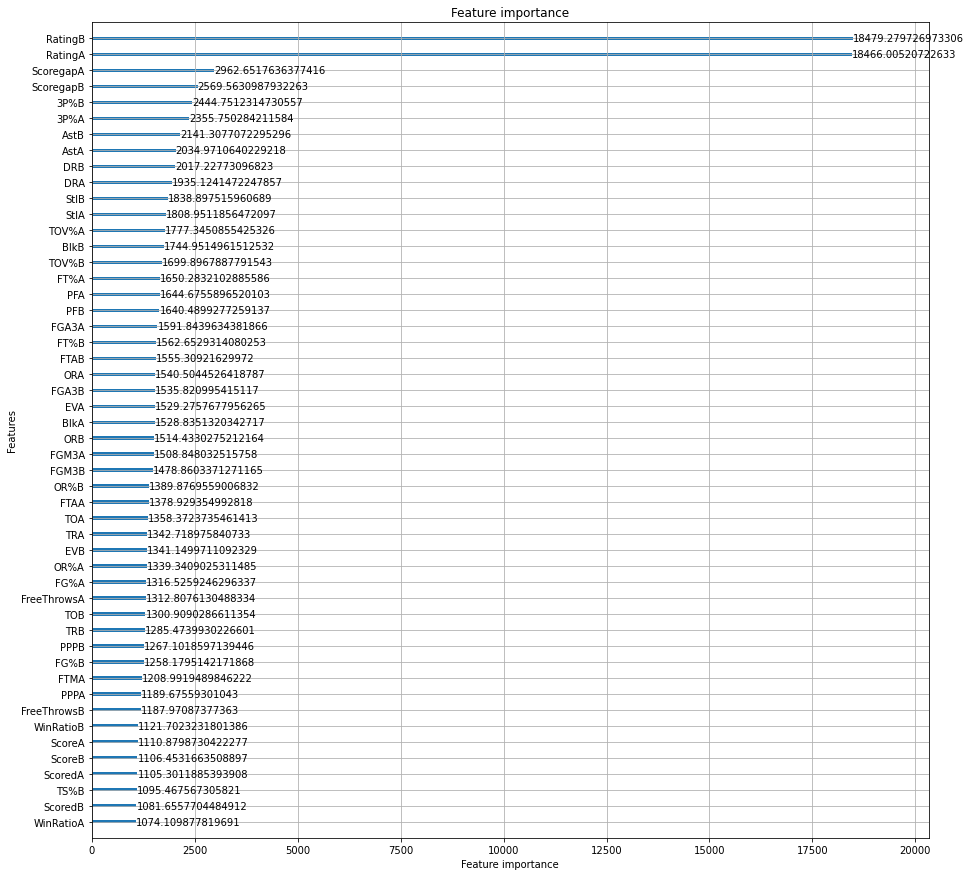

In [20]:
fig,ax = plt.subplots(figsize=(15,15))
lgb.plot_importance(model, ax=ax,importance_type='gain',max_num_features=50)
plt.show()

### V. Submission

In [21]:
result = pd.read_csv("./2021NCAA.csv")
test["Predict"] = np.mean(y_test,axis=0)
pred = test[["TeamIdA","TeamIdB","Predict"]]

In [22]:
total = result.merge(pred,left_on=["TeamIdA","TeamIdB"],right_on=["TeamIdA","TeamIdB"])
total

,TeamIdA,TeamIdB,Result,Predict
0,1111,1313,0,0.621485
1,1179,1455,1,0.582330
2,1277,1417,0,0.303601
3,1140,1417,0,0.541142
4,1101,1417,0,0.348606
...,...,...,...,...
62,1160,1199,0,0.479605
63,1101,1400,1,0.192850
64,1163,1268,0,0.446862
65,1104,1233,1,0.867411


In [23]:
score = log_loss(total["Result"],total["Predict"])
score

0.5726595696888482